In [1]:
#importacion de librerias previamente instaladas en el entorno virtual
import pandas as pd
import requests
import seaborn as sns
import os
from dotenv import load_dotenv

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
load_dotenv() #Carga archivo .env

client_secret = os.getenv("client_secret")
code = os.getenv("code")
redirect_uri = os.getenv("redirect_uri")
client_id = os.getenv("client_id")

In [3]:
#Pasos para obtener el access token

url = "https://api.mercadolibre.com/oauth/token"

# Encabezados
headers = {
    "accept": "application/json",
    "content-type": "application/x-www-form-urlencoded"
}

# Datos de la solicitud
data = {
    "grant_type": "authorization_code",
    "client_id": client_id,
    "client_secret": client_secret,
    "code": code,
    "redirect_uri": redirect_uri
}

response = requests.post(url, headers=headers, data=data)

print(response.json())

{'access_token': 'APP_USR-524947060109741-031700-d20ba0072f9fc3ddf4b996c34529d7fb-225968867', 'token_type': 'Bearer', 'expires_in': 21600, 'scope': 'offline_access read write', 'user_id': 225968867, 'refresh_token': 'TG-67d7a962c3787b0001dd1ea1-225968867'}


In [4]:
token = response.json().get("access_token")
print(token)

APP_USR-524947060109741-031700-d20ba0072f9fc3ddf4b996c34529d7fb-225968867


In [5]:
# Encabezados con el token de autorización
headers = {
    "Authorization": f"Bearer {token}"
}


## Ejercicio 1
https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json 

En este caso particular y solo a modo de ejemplo, son resultados para la búsqueda “chromecast”, pero deberás elegir otros términos para el experimento que permitan enriquecer el análisis en un hipotético dashboard (ejemplo Google Home, Apple TV, Amazon Fire TV, o afines para poder comparar dispositivos portátiles, o bien elegir otros 3 que te interesen para comparar). 

### Aclaración
Para estos ejercicios se realizaron 4 búsquedas y no 3, tomé esta decisión porque al haber pocos productos de Google Home no llegaba a cumplir el mínimo de productos que pedía el enunciado (150)

### Google Home

In [40]:
#Para este primer ejercicio vamos a usar los ejemplos proporcionados (Google Home, Apple TV y Amazon Fire TV)
#Para ver mejor el paso a paso iremos ejemplo por ejemplo 

# Hacer la solicitud GET con el token en los headers
response = requests.get(
    "https://api.mercadolibre.com/sites/MLA/search?q=Google Home&limit=50",
    headers=headers
)

df_google = pd.DataFrame(response.json()['results'])

price_google = df_google.price.median()
quantity_google = df_google.available_quantity.sum()

df_google.head(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,variation_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,variation_filters,shipping,stop_time,seller,address,attributes,variations_data,installments,winner_item_id,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,installments_motors,result_type,official_store_name
0,MLA1597574484,Parlante Google Home Mini Asistente Virtual Re...,new,796916-MLA73322349956_122023,MLA15541914,gold_special,,https://articulo.mercadolibre.com.ar/MLA-15975...,buy_it_now,MLA,MLA409415,MLA-SMART_SPEAKERS,179437602228,http://http2.mlstatic.com/D_796916-MLA73322349...,ARS,1,41270.0,69990.0,"{'price_id': '', 'amount': 41270, 'conditions'...",1,NaN,False,True,[COLOR],"{'store_pick_up': False, 'free_shipping': True...",2043-12-08T04:00:00.000Z,"{'id': 284824585, 'nickname': 'SKY- VISION'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",{'179437602228': {'thumbnail': 'http://http2.m...,"{'quantity': 6, 'amount': 9144.74, 'rate': 32....",None,False,None,None,None,None,None,item,NaN
1,MLA926322306,Google Nest Hub Con Asistente Virtual Google A...,new,740239-MLA43071191161_082020,MLA15532617,gold_special,,https://www.mercadolibre.com.ar/google-nest-hu...,buy_it_now,MLA,MLA409415,MLA-SMART_SPEAKERS,NaN,http://http2.mlstatic.com/D_740239-MLA43071191...,ARS,2,315000.0,NaN,"{'price_id': '', 'amount': 315000, 'conditions...",1,NaN,True,True,NaN,"{'store_pick_up': False, 'free_shipping': True...",2041-06-14T04:00:00.000Z,"{'id': 86543122, 'nickname': 'BAY-TEC'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,"{'quantity': 6, 'amount': 69798.75, 'rate': 32...",None,True,None,None,None,None,None,item,NaN
2,MLA930506223,Soporte Montaje Embutido Pared Google Home Hub...,new,765698-MLA46838404907_072021,None,gold_special,,https://articulo.mercadolibre.com.ar/MLA-93050...,buy_it_now,MLA,MLA409415,MLA-SMART_SPEAKERS,179749948797,http://http2.mlstatic.com/D_765698-MLA46838404...,ARS,3,19900.0,NaN,"{'price_id': '', 'amount': 19900, 'conditions'...",1,NaN,False,True,[COLOR],"{'store_pick_up': False, 'free_shipping': Fals...",2041-07-17T04:00:00.000Z,"{'id': 86543122, 'nickname': 'BAY-TEC'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",{'179749948797': {'thumbnail': 'http://http2.m...,"{'quantity': 6, 'amount': 4409.51, 'rate': 32....",None,False,None,None,None,None,None,item,NaN


### Apple tv

In [41]:
response = requests.get(
    "https://api.mercadolibre.com/sites/MLA/search?q=Apple TV&limit=50",
    headers=headers
)


df_apple = pd.DataFrame(response.json()['results'])

price_apple = df_apple.price.median()
quantity_apple = df_apple.available_quantity.sum()

df_apple.head(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,official_store_name,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,installments_motors,result_type,variation_id,variation_filters,variations_data
0,MLA1366426083,Apple Tv 4k (wifi) A2737 De Voz 3.ª Generación...,new,662921-MLA53529199006_012023,MLA1021459431,gold_special,,https://www.mercadolibre.com.ar/apple-tv-4k-wi...,buy_it_now,MLA,MLA352001,MLA-STREAMING_MEDIA_DEVICES,http://http2.mlstatic.com/D_662921-MLA53529199...,ARS,1,332427.18,405399.0,"{'price_id': '', 'amount': 332427.18, 'conditi...",1,2549.0,Apple,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-04-13T04:00:00.000Z,"{'id': 553476757, 'nickname': 'ONECLICK ARGENT...","{'state_id': 'AR-B', 'state_name': 'Buenos Air...","[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 6, 'amount': 73660.32, 'rate': 32...",None,True,None,None,None,YKUG87716,None,item,NaN,NaN,NaN
1,MLA1449403463,Apple Tv Hd A1625 De Voz 4.ª Generación 2015 F...,new,633039-MLA32691404911_102019,MLA6253544,gold_special,,https://www.mercadolibre.com.ar/apple-tv-hd-a1...,buy_it_now,MLA,MLA352001,MLA-STREAMING_MEDIA_DEVICES,http://http2.mlstatic.com/D_633039-MLA32691404...,ARS,2,191990.00,599990.0,"{'price_id': '', 'amount': 191990, 'conditions...",1,NaN,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-09-06T04:00:00.000Z,"{'id': 119914491, 'nickname': 'GAMESTATION ARG'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 6, 'amount': 42541.78, 'rate': 32...",None,True,None,None,None,SPBC10976,None,item,NaN,NaN,NaN
2,MLA1361061092,Apple Tv 4k (wifi + Ethernet) A2843 De Voz 3.ª...,new,911533-MLA53244962397_012023,MLA21015906,gold_special,,https://www.mercadolibre.com.ar/apple-tv-4k-wi...,buy_it_now,MLA,MLA352001,MLA-STREAMING_MEDIA_DEVICES,http://http2.mlstatic.com/D_911533-MLA53244962...,ARS,3,468512.00,NaN,"{'price_id': '', 'amount': 468512, 'conditions...",1,NaN,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-02-24T04:00:00.000Z,"{'id': 1017136269, 'nickname': 'FLUXSOLUTIONS....","{'state_id': 'AR-B', 'state_name': 'Buenos Air...","[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 6, 'amount': 103814.45, 'rate': 3...",None,True,None,None,None,None,None,item,NaN,NaN,NaN


### Amazon Fire TV

In [42]:
response = requests.get(
    "https://api.mercadolibre.com/sites/MLA/search?q=Amazon Fire&limit=50",
    headers=headers
)

df_amazon = pd.DataFrame(response.json()['results'])

price_amazon = df_amazon.price.median()
quantity_amazon = df_amazon.available_quantity.sum()

df_amazon.head(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,installments_motors,result_type,official_store_name,variation_id,variation_filters,variations_data
0,MLA1364191101,Amazon Lite Fire Tv Stick B091g4yp57 De Voz Fu...,new,848963-MLU74112953338_012024,MLA19732185,gold_special,,https://www.mercadolibre.com.ar/amazon-lite-fi...,buy_it_now,MLA,MLA352001,MLA-STREAMING_MEDIA_DEVICES,http://http2.mlstatic.com/D_848963-MLU74112953...,ARS,1,57985.0,NaN,"{'price_id': '', 'amount': 57985, 'conditions'...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-03-24T04:00:00.000Z,"{'id': 541665065, 'nickname': 'ELECTRONICS BELL'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 6, 'amount': 12848.51, 'rate': 32...",None,True,None,None,None,DTYH13895,None,item,NaN,NaN,NaN,NaN
1,MLA1974011366,Table Amazon Fire 7 2022 16gb Negro - Bestmart,new,817458-MLA81066474854_122024,MLA24594596,gold_special,,https://www.mercadolibre.com.ar/table-amazon-f...,buy_it_now,MLA,MLA82085,MLA-TABLETS,http://http2.mlstatic.com/D_817458-MLA81066474...,ARS,2,99999.0,NaN,"{'price_id': '', 'amount': 99999, 'conditions'...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-12-05T04:00:00.000Z,"{'id': 1002842391, 'nickname': 'FENIXCORP SRL'}","{'state_id': 'AR-B', 'state_name': 'Buenos Air...","[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 6, 'amount': 22158.11, 'rate': 32...",None,True,None,None,None,MKIP88377,None,item,NaN,NaN,NaN,NaN
2,MLA1374156562,Fire Tv Stick 4k 2023 Compatible Wifi 6 Con 2g...,new,814985-MLA81098692218_122024,MLA28024922,gold_special,,https://www.mercadolibre.com.ar/fire-tv-stick-...,buy_it_now,MLA,MLA352001,MLA-STREAMING_MEDIA_DEVICES,http://http2.mlstatic.com/D_814985-MLA81098692...,ARS,3,79999.0,NaN,"{'price_id': '', 'amount': 79999, 'conditions'...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-10-22T13:41:59.762Z,"{'id': 541665065, 'nickname': 'ELECTRONICS BELL'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 6, 'amount': 17726.45, 'rate': 32...",None,True,None,None,None,XJVK11619,None,item,NaN,NaN,NaN,NaN


## Xiaomi

In [49]:

response = requests.get(
    "https://api.mercadolibre.com/sites/MLA/search?q=Xiaomi Mi Smart Home&limit=50",
    headers=headers
)

df_xiaomi = pd.DataFrame(response.json()['results'])
price_xiaomi = df_xiaomi.price.median()
quantity_xiaomi = df_xiaomi.available_quantity.sum()

df_xiaomi.head(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,official_store_name,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,installments_motors,result_type,variation_id,variation_filters,variations_data
0,MLA1398421729,Sensor Xiaomi De Puerta Y Ventana App Mi Smart...,new,652821-MLU75328081382_032024,MLA28699462,gold_special,,https://www.mercadolibre.com.ar/sensor-xiaomi-...,buy_it_now,MLA,MLA4625,MLA-HOME_ALARMS_AND_SENSORS,http://http2.mlstatic.com/D_652821-MLU75328081...,ARS,1,20049.00,NaN,"{'price_id': '', 'amount': 20049, 'conditions'...",1,74466.0,PCREGISTRADA,True,True,"{'store_pick_up': False, 'free_shipping': Fals...",2043-12-02T04:00:00.000Z,"{'id': 666749750, 'nickname': 'PCREGISTRADAOK'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 6, 'amount': 4442.52, 'rate': 32....",None,True,None,None,None,None,None,item,NaN,NaN,NaN
1,MLA1407486187,Foco Led Con Wi-fi Xiaomi Mi Led Essential Bom...,new,744091-MLU73711938102_012024,MLA44118606,gold_special,,https://www.mercadolibre.com.ar/foco-led-con-w...,buy_it_now,MLA,MLA377395,MLA-LIGHT_BULBS,http://http2.mlstatic.com/D_744091-MLU73711938...,ARS,2,43999.00,NaN,"{'price_id': '', 'amount': 43999, 'conditions'...",1,NaN,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-05-11T17:42:45.000Z,"{'id': 448487402, 'nickname': 'OHPIC'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 6, 'amount': 9749.45, 'rate': 32....",None,True,None,None,None,ORKI74503,None,item,NaN,NaN,NaN
2,MLA1458715613,Xiaomi Smart Camara C500 Pro 3k Wi-fi Doble B...,new,703843-MLU75707378034_042024,MLA35961103,gold_special,,https://www.mercadolibre.com.ar/xiaomi-smart-c...,buy_it_now,MLA,MLA417835,MLA-SURVEILLANCE_CAMERAS,http://http2.mlstatic.com/D_703843-MLU75707378...,ARS,3,115599.32,169999.0,"{'price_id': '', 'amount': 115599.32, 'conditi...",50,52187.0,Jazak,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-10-30T04:00:00.000Z,"{'id': 257077964, 'nickname': 'JAZAKSHOP.COM'}","{'state_id': 'AR-C', 'state_name': 'Capital Fe...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 6, 'amount': 25614.88, 'rate': 32...",None,True,None,None,None,None,None,item,NaN,NaN,NaN


In [56]:
serie = pd.Series(['Google Home','Apple TV','Amazon Fire TV','Xiaomi'])

price_serie = pd.Series([price_google,price_apple,price_amazon,price_xiaomi])
quantity_serie = pd.Series([quantity_google,quantity_apple,quantity_amazon,quantity_xiaomi])

In [57]:
df_price = pd.DataFrame({'products':serie,'values':price_serie})

df_price = df_price.sort_values(by='values', ascending=False)

df_price

,products,values
2,Amazon Fire TV,113936.00
1,Apple TV,80000.00
0,Google Home,61341.70
3,Xiaomi,26475.38


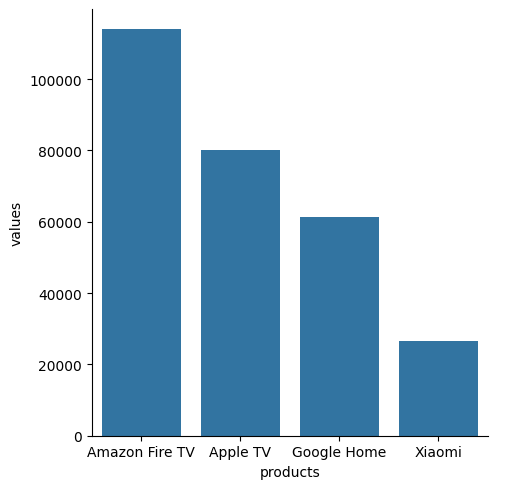

In [58]:
sns.catplot(x='products', y='values', data=df_price, kind='bar')

#### Un análisis rapido es claramente como los productos de Amazon Fire TV son mas caros comparados con la competencia. Por otro lado es que los productos de Xiaomi son los mas económicos de los 4

In [59]:
df_quantity = pd.DataFrame({'products':serie,'values':quantity_serie})

df_quantity = df_quantity.sort_values(by='values', ascending=False)

df_quantity

,products,values
0,Google Home,15019
3,Xiaomi,7586
2,Amazon Fire TV,345
1,Apple TV,49


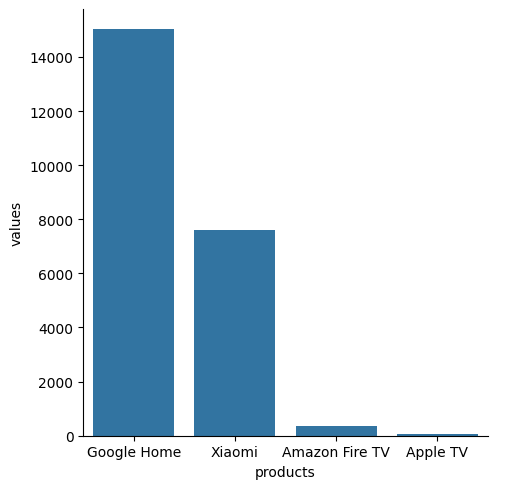

In [60]:
sns.catplot(x='products', y='values', data=df_quantity, kind='bar')

#### Otro análisis rapido es ver como hay más cantidad disponible (stock) de los productos de Google y Xiaomi comparado con los demás, eso también explica porque son mas baratos debido a la oferta y demanda.

## Ejercicio 2
2) Por cada resultado, realizar el correspondiente GET por Item_Id al recurso público: 
https://api.mercadolibre.com/items/{Item_Id} 

In [61]:
#Unimos los 3 df anteriores

df_total = pd.concat([df_google,df_amazon,df_apple,df_xiaomi],axis=0)

len(df_total)

171

In [76]:
#Para la primera iteracion
df_final = pd.DataFrame()

for index, i in enumerate(df_total['id']):
        print("iteracion:",index) #para control, se puede obviar
        campos_principales = requests.get("https://api.mercadolibre.com/items/"+i,headers=headers).json()
        df = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i,headers=headers).json()['sale_terms'])
        df['id'] = campos_principales['id']
        df['site_id'] = campos_principales['site_id']
        df['title'] = campos_principales['title']
        df['seller_id'] = campos_principales['seller_id']
        df['category_id'] = campos_principales['category_id']
        df['official_store_id'] = campos_principales['official_store_id']
        df['price'] = campos_principales['price']
        df['base_price'] = campos_principales['base_price']
        df['original_price'] = campos_principales['original_price']
        df['currency_id'] = campos_principales['currency_id']
        df['initial_quantity'] = campos_principales['initial_quantity']
        df['catalog_product_id'] = campos_principales['catalog_product_id']
        df_final = pd.concat([df_final, df], axis=0)


        

iteracion: 0
iteracion: 1
iteracion: 2
iteracion: 3
iteracion: 4
iteracion: 5
iteracion: 6
iteracion: 7
iteracion: 8
iteracion: 9
iteracion: 10
iteracion: 11
iteracion: 12
iteracion: 13
iteracion: 14
iteracion: 15
iteracion: 16
iteracion: 17
iteracion: 18
iteracion: 19
iteracion: 20
iteracion: 21
iteracion: 22
iteracion: 23
iteracion: 24
iteracion: 25
iteracion: 26
iteracion: 27
iteracion: 28
iteracion: 29
iteracion: 30
iteracion: 31
iteracion: 32
iteracion: 33
iteracion: 34
iteracion: 35
iteracion: 36
iteracion: 37
iteracion: 38
iteracion: 39
iteracion: 40
iteracion: 41
iteracion: 42
iteracion: 43
iteracion: 44
iteracion: 45
iteracion: 46
iteracion: 47
iteracion: 48
iteracion: 49
iteracion: 50
iteracion: 51
iteracion: 52
iteracion: 53
iteracion: 54
iteracion: 55
iteracion: 56
iteracion: 57
iteracion: 58
iteracion: 59
iteracion: 60
iteracion: 61
iteracion: 62
iteracion: 63
iteracion: 64
iteracion: 65
iteracion: 66
iteracion: 67
iteracion: 68
iteracion: 69
iteracion: 70
iteracion: 71
it

### 3) Escribir los resultados:
Escribir los resultados en un archivo plano delimitado por comas, desnormalizando el JSON obtenido en el paso anterior, en tantos campos como sea necesario para guardar las variables que te interesen modelar.

In [77]:
df_final.to_csv('items_meli.csv',sep=',',index=False)